In [3]:
import os
import sys

sys.path.append(os.path.abspath(".."))

In [4]:
from src.data_prep import load_data, prepare_stock_df, align_dates
from src.sentiment import add_sentiment_scores
from src.indicators import add_technical_indicators
from scripts.visualize import plot_stock_with_indicators, plot_sentiment

In [5]:
df = load_data("../data/raw_analyst_ratings.csv")
print(df.columns)

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')


In [6]:
# Align dates
df = align_dates(df)


In [7]:
df_sample = df.head(5000).copy() 

df_sample = add_sentiment_scores(df_sample, column='headline')

print("Sample Results:")
print(df_sample[['headline', 'vader_sentiment', 'textblob_sentiment']].head())

Sample Results:
                                            headline  vader_sentiment  \
0            Stocks That Hit 52-Week Highs On Friday            0.000   
1         Stocks That Hit 52-Week Highs On Wednesday            0.000   
2                      71 Biggest Movers From Friday            0.000   
3       46 Stocks Moving In Friday's Mid-Day Session            0.000   
4  B of A Securities Maintains Neutral on Agilent...            0.296   

   textblob_sentiment  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  


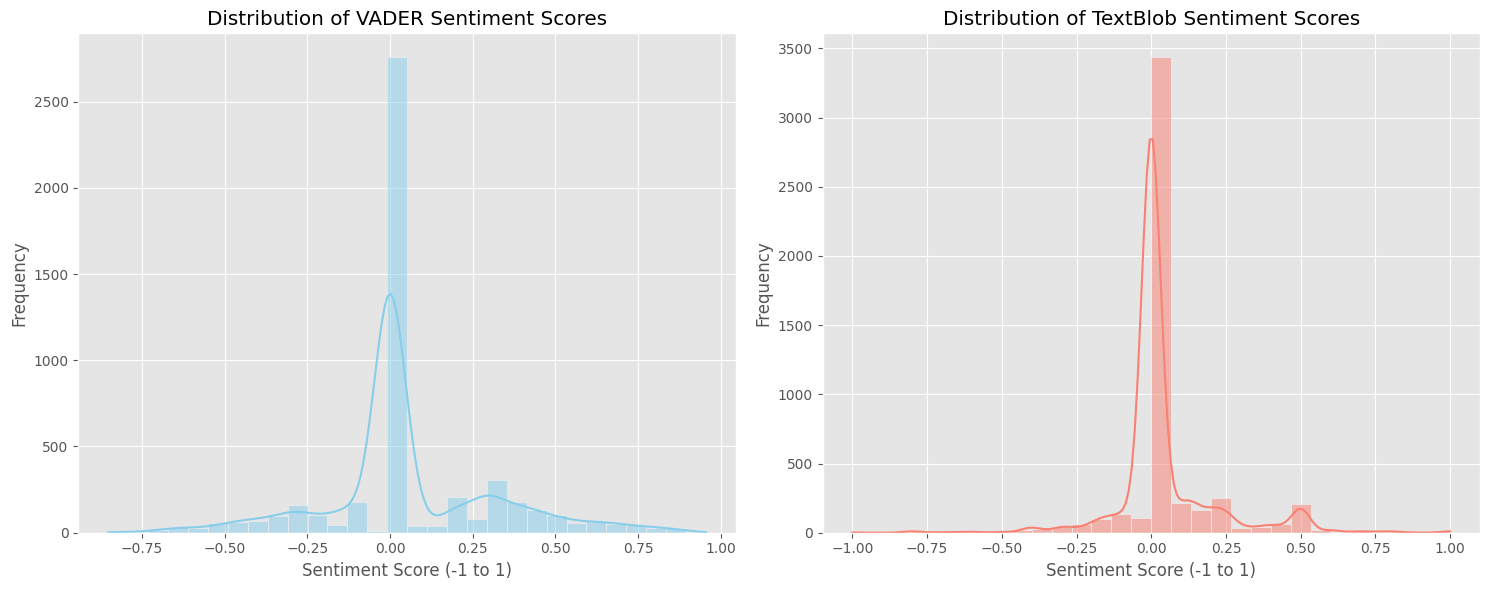

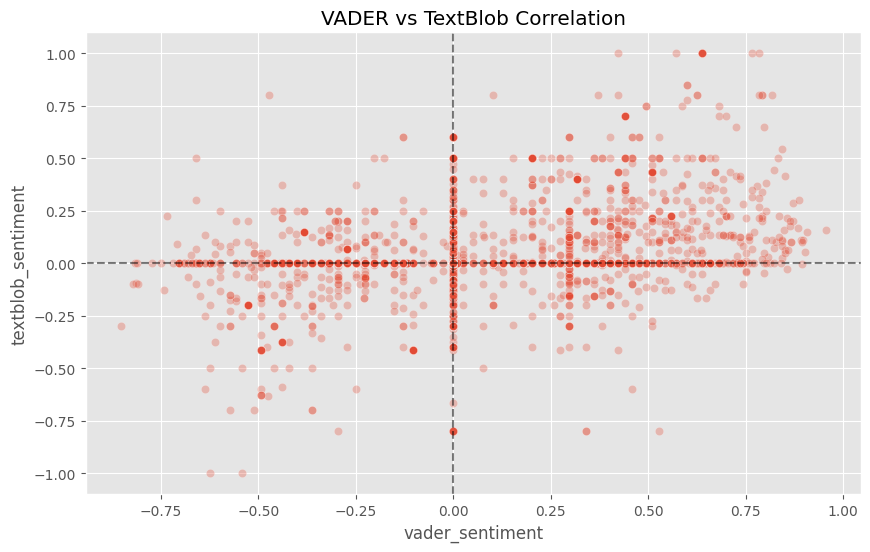

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Distribution of VADER Sentiment Scores
sns.histplot(df_sample['vader_sentiment'], bins=30, kde=True, ax=ax1, color='skyblue')
ax1.set_title('Distribution of VADER Sentiment Scores')
ax1.set_xlabel('Sentiment Score (-1 to 1)')
ax1.set_ylabel('Frequency')

# 2. Distribution of TextBlob Sentiment Scores
sns.histplot(df_sample['textblob_sentiment'], bins=30, kde=True, ax=ax2, color='salmon')
ax2.set_title('Distribution of TextBlob Sentiment Scores')
ax2.set_xlabel('Sentiment Score (-1 to 1)')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 3. Scatter Plot Comparison
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sample, x='vader_sentiment', y='textblob_sentiment', alpha=0.3)
plt.title('VADER vs TextBlob Correlation')
plt.axhline(0, color='black', linestyle='--', alpha=0.5)
plt.axvline(0, color='black', linestyle='--', alpha=0.5)
plt.show()